<a href="https://colab.research.google.com/github/juniorPalomino25/CursoNetCore/blob/master/DL08VerificacionManual_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de Validación Manual**

### Importar librerías

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy

### Cargar los datos

In [ ]:
datos = numpy.loadtxt("sonar_transformado_R_M.txt",delimiter=",")

Dividir la entrada (X) y la salida (y)

In [ ]:
X = datos[:,0:60]

In [ ]:
y = datos[:,60]

Dividir 67% para entrenamiento y 33% para prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

Crear el modelo

In [ ]:
modelo = Sequential()
modelo.add(Dense(12, input_dim=60, activation='relu'))
modelo.add(Dense(8,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))

Compilar el modelo

In [ ]:
modelo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Entrenar el modelo

In [ ]:
historia = modelo.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
14/14 [==============================] - 2s 20ms/step - loss: 0.6949 - accuracy: 0.4892 - val_loss: 0.6910 - val_accuracy: 0.5652
Epoch 2/150
14/14 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5683 - val_loss: 0.6830 - val_accuracy: 0.5507
Epoch 3/150
14/14 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.5468 - val_loss: 0.6782 - val_accuracy: 0.5507
Epoch 4/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6769 - accuracy: 0.5396 - val_loss: 0.6744 - val_accuracy: 0.5507
Epoch 5/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.5396 - val_loss: 0.6722 - val_accuracy: 0.5652
Epoch 6/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.5540 - val_loss: 0.6694 - val_accuracy: 0.5797
Epoch 7/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5755 - val_loss: 0.6657 - val_accuracy: 0.5797
Epoch 8/150


### Graficar la historia

In [ ]:
# Función para graficar la historia

EPOCAS = 150
import matplotlib.pyplot as plt
import numpy as np
def graficar(h):
  LOSS = 0; ACCURACY = 1
  entrenamiento = np.zeros((2,EPOCAS));
  prueba = np.zeros((2,EPOCAS));
  entrenamiento[LOSS] = h.history['loss'] # loss de entrenamiento
  prueba[LOSS] = h.history['val_loss'] # loss de validación
  entrenamiento[ACCURACY] = h.history['accuracy'] #acc de entrenamiento
  prueba[ACCURACY] = h.history['val_accuracy'] #acc de validación
  epocas = range(1,EPOCAS+1)
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  for i, label in zip((LOSS,ACCURACY),('perdida','exactitud')):
    axs[i].plot(epocas,entrenamiento[i],'b-',label='Entrenamiento '+label)
    axs[i].plot(epocas,prueba[i],'y-',label='Prueba '+label)
    axs[i].set_title('Entrenamiento y prueba ' + label)
    axs[i].set_xlabel('Epocas')
    axs[i].set_ylabel(label)
    axs[i].legend()
  plt.show()

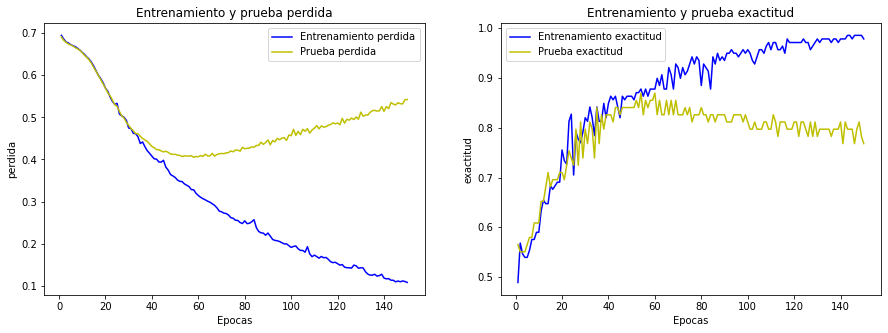

In [ ]:
graficar(historia)